In [1]:
import numpy as np
import pandas as pd
from dtaianomaly.data_management import DataManager
from dtaianomaly.visualization import plot_data

In [2]:
np.random.seed(42)

In [3]:
data_manager = DataManager('../data')
indices = data_manager.select({'collection_name': 'Demo'}).get()
for index in indices:
    data_manager.remove_dataset(index)

## Demo 1

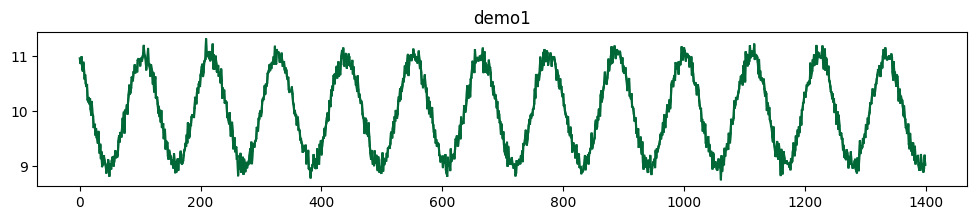

In [4]:
trend_data = np.sin(np.linspace(0, 25 * np.pi, 1400) + 2)
trend_data += np.random.normal(10, 0.1, trend_data.shape)
trend_data_df = pd.DataFrame({'demo1': trend_data, 'is_anomaly': np.zeros_like(trend_data)})
trend_data_df.index.name = 'timestamp'
fig = plot_data(trend_data_df, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

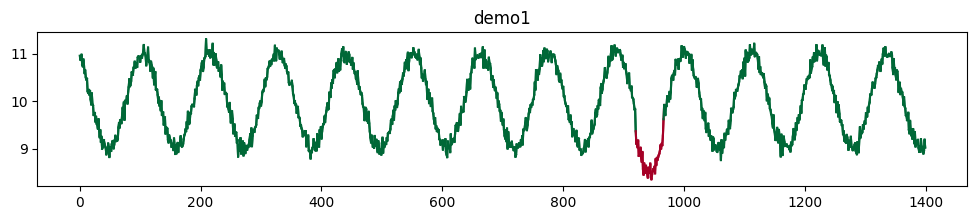

In [5]:
start_anomaly = 920
end_anomaly = 965
trend_data[start_anomaly:end_anomaly] -= 0.5
trend_data_df.loc[start_anomaly:end_anomaly, 'demo1'] -= 0.5
trend_data_df.loc[start_anomaly:end_anomaly, 'is_anomaly'] = 1
fig = plot_data(trend_data_df, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [6]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo1',
    test_data=trend_data_df,
    test_path='demo/demo1.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Approximately based on the figure
)

## Demo 2

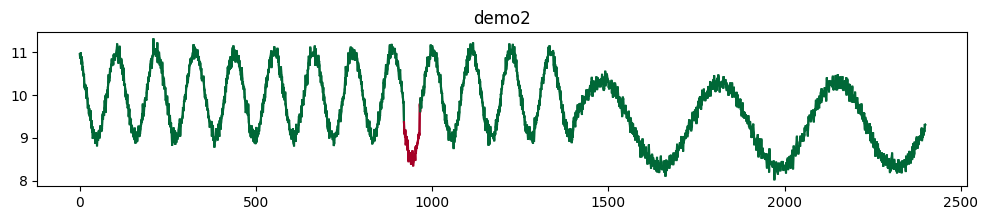

In [7]:
length_extra_part = 1000
extra_part = np.sin(np.linspace(0, 6 * np.pi, 1000))
extra_part += np.random.normal(9.3, 0.1, extra_part.shape)
trend_data_df_2 = pd.DataFrame({
    'demo2': np.concatenate([trend_data, extra_part]),
    'is_anomaly': np.concatenate([trend_data_df['is_anomaly'].values, np.zeros_like(extra_part)])
})
trend_data_df_2.index.name = 'timestamp'
fig = plot_data(trend_data_df_2, show_ground_truth='overlay')
fig.set_size_inches(12, 2)

In [8]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo2',
    test_data=trend_data_df_2,
    test_path='demo/demo2.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Smallest period
)

## Demo 3

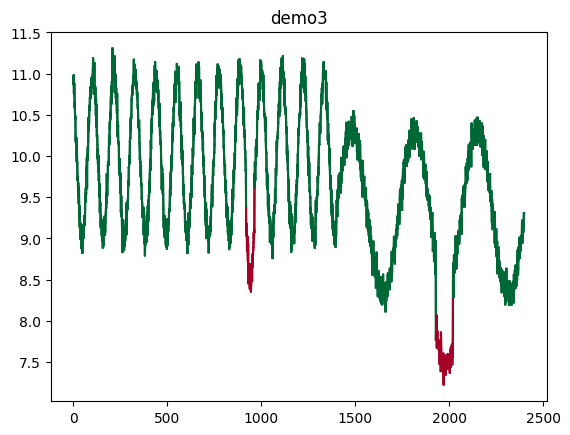

In [9]:
start_new_anomaly, end_new_anomaly = 1930, 2020
trend_data_df_3 = trend_data_df_2.copy()
trend_data_df_3.rename(columns={'demo2': 'demo3'}, inplace=True)
trend_data_df_3.loc[start_new_anomaly:end_new_anomaly, 'demo3'] *= 0.9
trend_data_df_3.loc[start_new_anomaly:end_new_anomaly, 'is_anomaly'] = 1
plot_data(trend_data_df_3, show_ground_truth='overlay');

In [10]:
data_manager.add_dataset(
    collection_name='Demo',
    dataset_name='Demo3',
    test_data=trend_data_df_3,
    test_path='demo/demo3.csv',
    dataset_type='synthetic',
    train_type='unsupervised',
    train_is_normal=False,
    trend='no trend',
    stationarity=None,
    period_size=100  # Smallest period
)

## Check reading the demo time series

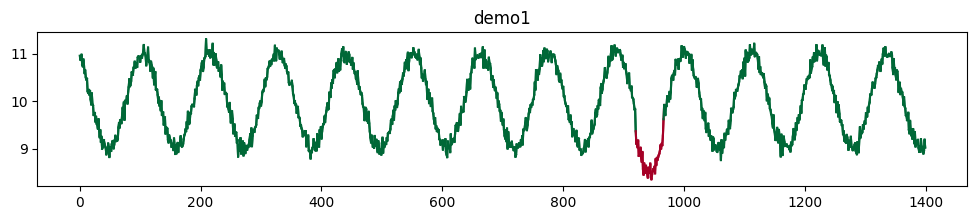

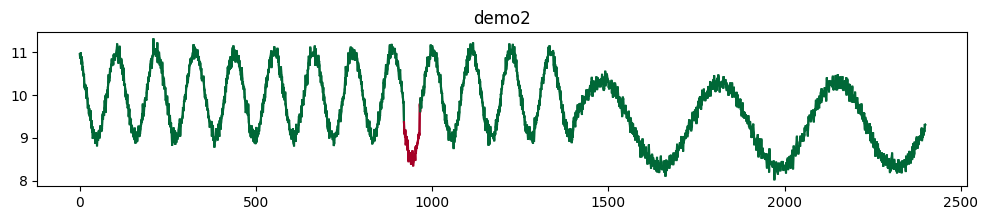

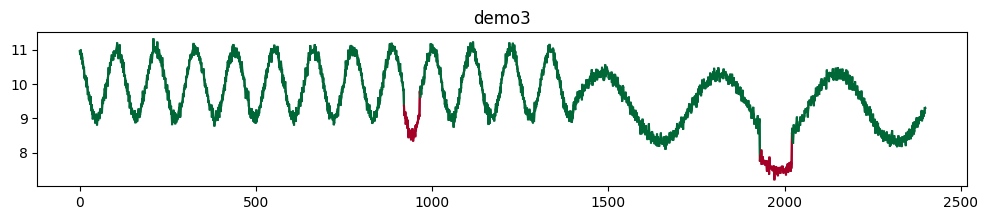

In [11]:
data_manager.clear()
data_manager.select({'collection_name': 'Demo'})
for dataset_index in data_manager.get():
    fig = plot_data(data_manager.load(dataset_index), show_ground_truth='overlay')
    fig.set_size_inches(12, 2)